1) Librairies Required

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from  matplotlib.ticker import PercentFormatter
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (30,10)

2) Import Dataset

In [2]:
heart_2022 = pd.read_csv("heart_2022_no_nans.csv")
heart_2022

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,bmi_category,Heart_attack
0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,Overweight,0
1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,...,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Obese,0
2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,...,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Obese,0
3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Obese,0
4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,...,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Obese,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0,0,Within past 2 years (1 year but less than 2 ye...,Yes,6,None of them,No,...,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,Obese,0
246018,Virgin Islands,Female,Fair,0,7,Within past year (anytime less than 12 months ...,Yes,7,None of them,No,...,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,Healthy Weight,0
246019,Virgin Islands,Male,Good,0,15,Within past year (anytime less than 12 months ...,Yes,7,1 to 5,No,...,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,Overweight,0
246020,Virgin Islands,Female,Excellent,2,2,Within past year (anytime less than 12 months ...,Yes,7,None of them,No,...,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,Overweight,0


In [3]:
#Let's confirm there is null values in our heart_2022 datafram
print(heart_2022.isnull().sum())

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

Let's check for duplicates

In [4]:
heart_2022.duplicated().sum()


9

In [5]:
Dup = heart_2022.duplicated().sum()
Dup_ratio = (100*Dup/len(heart_2022)).round(3)
print(f'The percentage of duplicated data is {Dup_ratio} %')

The percentage of duplicated data is 0.004 %


Let's drop duplicates

In [6]:
heart_2022.drop_duplicates()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,bmi_category,Heart_attack
0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,Overweight,0
1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,...,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Obese,0
2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,...,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Obese,0
3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Obese,0
4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,...,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Obese,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0,0,Within past 2 years (1 year but less than 2 ye...,Yes,6,None of them,No,...,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,Obese,0
246018,Virgin Islands,Female,Fair,0,7,Within past year (anytime less than 12 months ...,Yes,7,None of them,No,...,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,Healthy Weight,0
246019,Virgin Islands,Male,Good,0,15,Within past year (anytime less than 12 months ...,Yes,7,1 to 5,No,...,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,Overweight,0
246020,Virgin Islands,Female,Excellent,2,2,Within past year (anytime less than 12 months ...,Yes,7,None of them,No,...,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,Overweight,0


3) DATA CLEASING

In [7]:
#let's drop the Height and weight columns
heart_2022 = heart_2022.drop(["HeightInMeters", "WeightInKilograms"], axis=1)

In [8]:
heart_2022.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'bmi_category',
       'Heart_attack'],
      dtype='object')

In [9]:
#general information about heart_2022 dataframe
heart_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  int64  
 4   MentalHealthDays           246022 non-null  int64  
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  int64  
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [10]:
#Summary of heart_2022 dataframe
heart_2022.describe().T.style.background_gradient(cmap="Reds")

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,246022.000000,4.119026,8.405844,0.000000,0.000000,0.000000,3.000000,30.000000
MentalHealthDays,246022.000000,4.167140,8.102687,0.000000,0.000000,0.000000,4.000000,30.000000
SleepHours,246022.000000,7.021331,1.440681,1.000000,6.000000,7.000000,8.000000,24.000000
BMI,246022.000000,28.668136,6.513973,12.020000,24.270000,27.460000,31.890000,97.650000
Heart_attack,246022.000000,0.054609,0.227216,0.000000,0.000000,0.000000,0.000000,1.000000


Let's check if our dataframe have outliers

In [11]:
#First, we calculate interquartile range (IQR)

Q1 = heart_2022.quantile(0.25, numeric_only=True)
Q3 = heart_2022.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
IQR

PhysicalHealthDays    3.00
MentalHealthDays      4.00
SleepHours            2.00
BMI                   7.62
Heart_attack          0.00
dtype: float64

In [12]:
#Then, Outliers

Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

Outliers = heart_2022[((heart_2022[IQR.index] < Lower_Limit) | ((heart_2022[IQR.index] > Upper_Limit))).any(axis=1)]
Outliers

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,bmi_category,Heart_attack
4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,...,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Obese,0
7,Alabama,Male,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,8,1 to 5,Yes,...,24.37,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Healthy Weight,1
11,Alabama,Female,Good,3,4,Within past year (anytime less than 12 months ...,Yes,5,None of them,No,...,46.87,No,No,No,No,"Yes, received tetanus shot, but not Tdap",No,Yes,Obese,0
12,Alabama,Male,Good,5,0,Within past year (anytime less than 12 months ...,Yes,5,"6 or more, but not all",Yes,...,32.74,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Obese,1
14,Alabama,Male,Fair,25,25,Within past year (anytime less than 12 months ...,No,6,"6 or more, but not all",No,...,27.26,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes,Overweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246012,Virgin Islands,Male,Fair,7,30,Within past year (anytime less than 12 months ...,No,4,None of them,Yes,...,33.38,Yes,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,Obese,1
246014,Virgin Islands,Female,Good,0,0,Within past year (anytime less than 12 months ...,Yes,12,1 to 5,No,...,19.14,No,No,No,Yes,"Yes, received Tdap",No,No,Healthy Weight,0
246016,Virgin Islands,Male,Good,0,0,Within past year (anytime less than 12 months ...,No,6,1 to 5,Yes,...,36.54,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,Obese,1
246019,Virgin Islands,Male,Good,0,15,Within past year (anytime less than 12 months ...,Yes,7,1 to 5,No,...,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,Overweight,0


In [13]:
#Outliers percentage
percent_outliers = len(Outliers)*100 / len(heart_2022)
percent_outliers

29.33233613254099

Data without outliers and data with outliers

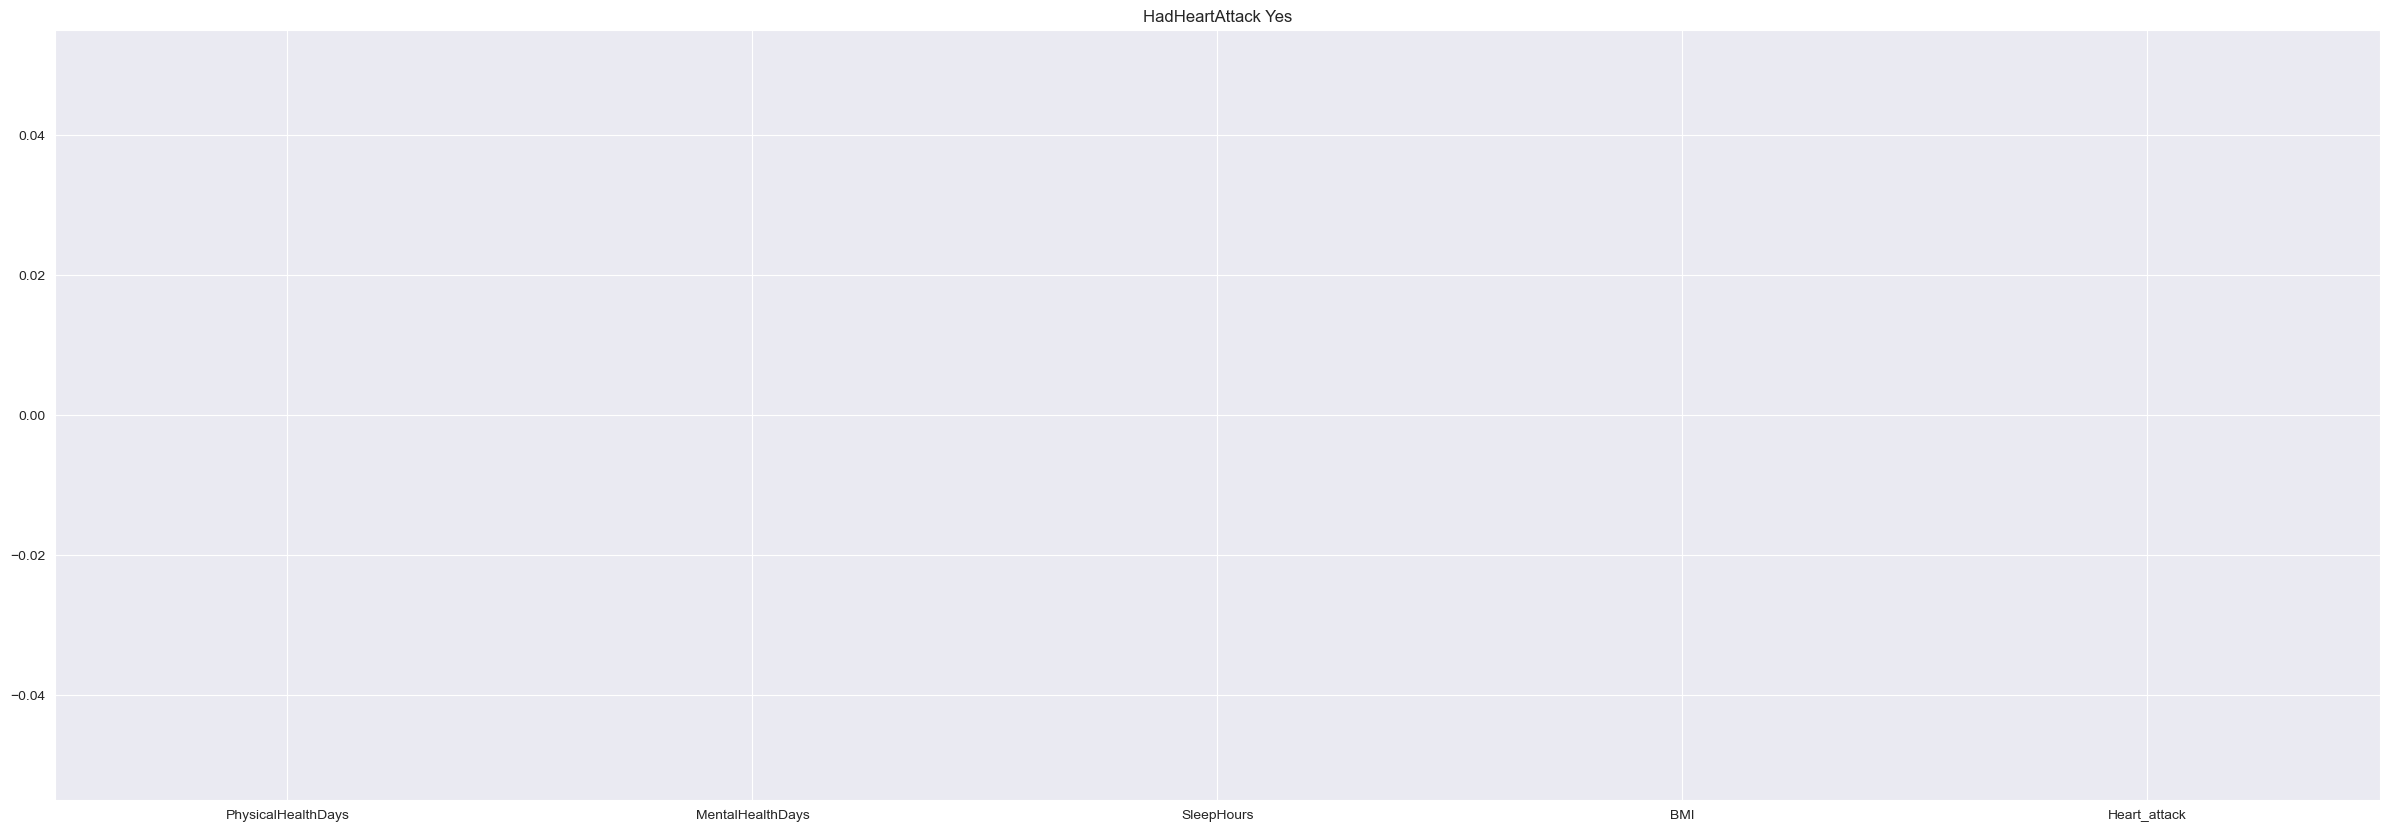

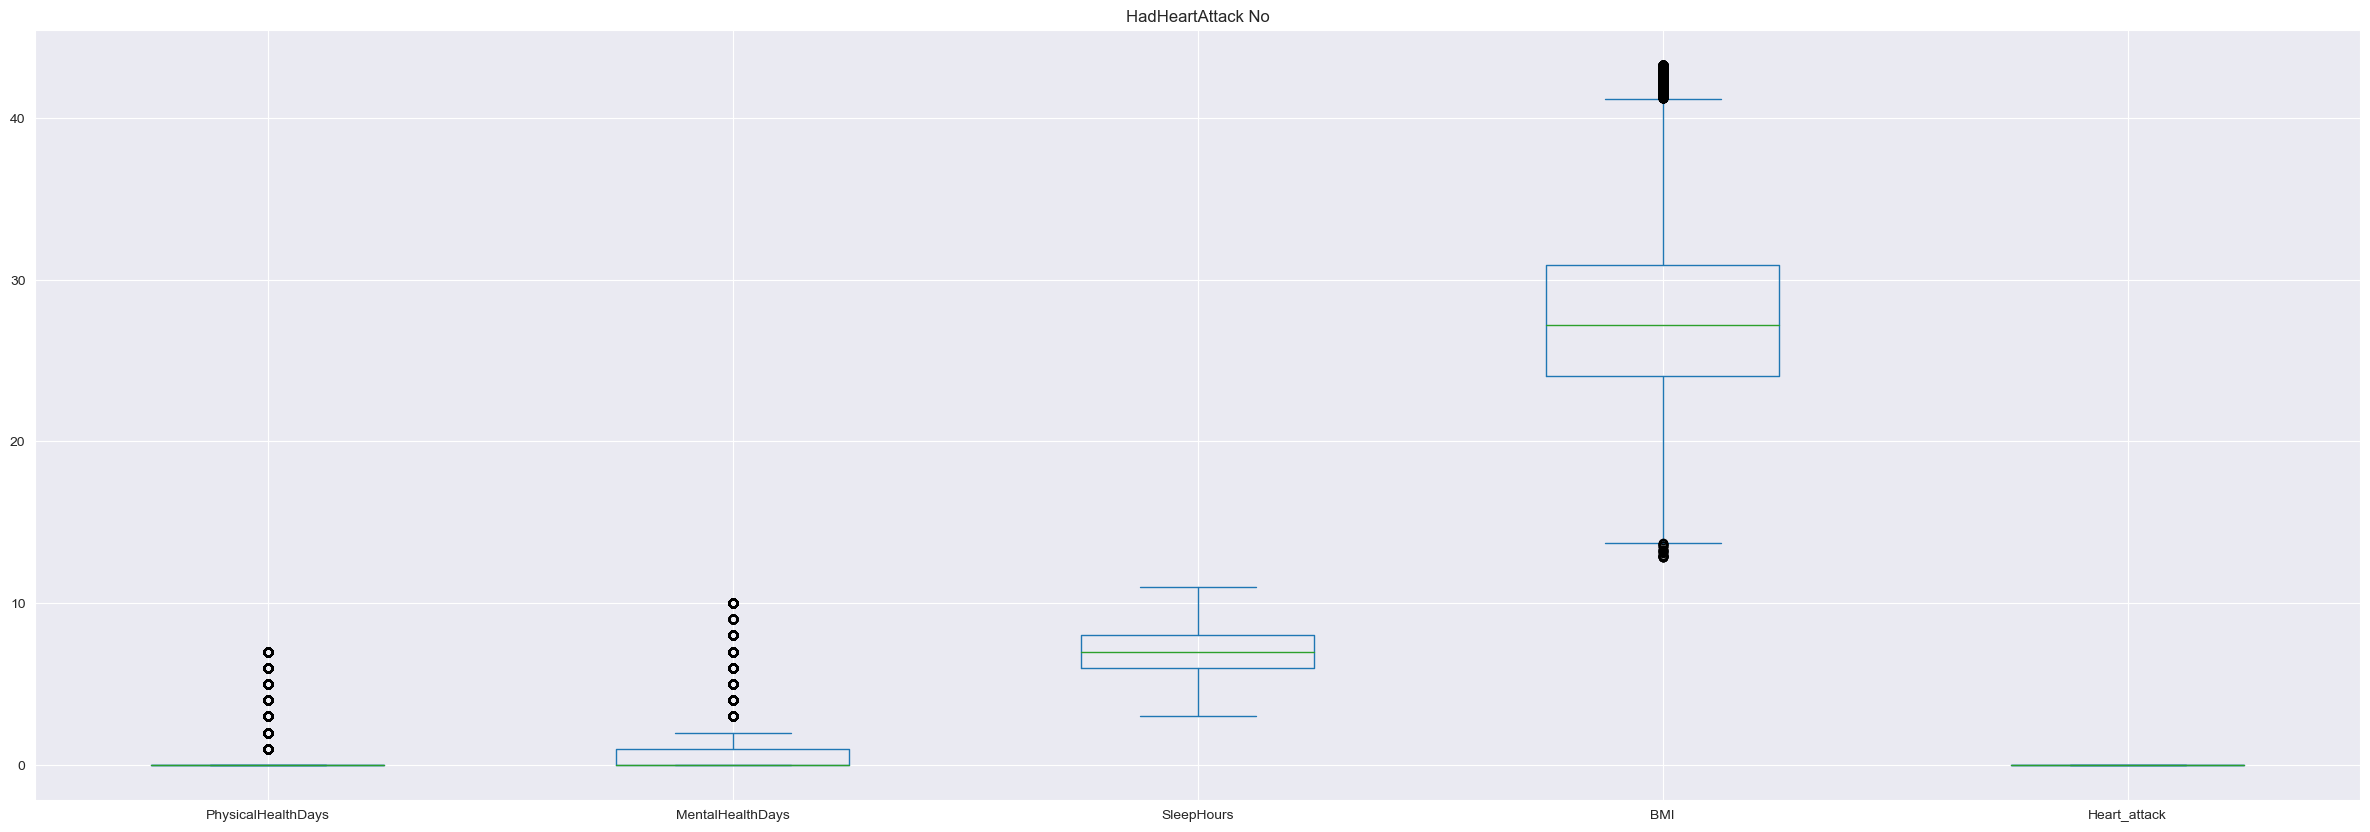

In [14]:
no_outliers = heart_2022[~((heart_2022[IQR.index] < Lower_Limit) | ((heart_2022[IQR.index] > Upper_Limit))).any(axis=1)]

condition_1 = no_outliers['HadHeartAttack']== "Yes"
dataframe_0 = no_outliers[condition_1] 
dataframe_0.plot(kind='box')
plt.title("HadHeartAttack" + " Yes")

condition_2 = no_outliers['HadHeartAttack']== "No"
dataframe_1 = no_outliers[condition_2] 
dataframe_1.plot(kind='box')
plt.title("HadHeartAttack" + " No")
plt.show()

In [15]:
dataframe_0

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,bmi_category,Heart_attack


In [16]:
dataframe_1

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,bmi_category,Heart_attack
0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,Overweight,0
1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,...,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Obese,0
2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,...,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Obese,0
3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Obese,0
5,Alabama,Male,Good,0,0,Within past year (anytime less than 12 months ...,Yes,7,None of them,No,...,34.96,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,Obese,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246013,Virgin Islands,Male,Excellent,0,7,Within past year (anytime less than 12 months ...,No,4,None of them,No,...,18.30,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,Underweight,0
246015,Virgin Islands,Female,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,7,1 to 5,No,...,28.29,Yes,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,No,Overweight,0
246017,Virgin Islands,Male,Very good,0,0,Within past 2 years (1 year but less than 2 ye...,Yes,6,None of them,No,...,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,Obese,0
246018,Virgin Islands,Female,Fair,0,7,Within past year (anytime less than 12 months ...,Yes,7,None of them,No,...,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,Healthy Weight,0


In this case study we are not dropping Outliers because it is imlying dropping the data of interest of this study, which is people that reported having heart attack

In [17]:
#let'ss count the number of unique vqlue for each variable
heart_2022.nunique()

State                          54
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
SleepHours                     23
RemovedTeeth                    4
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
ChestScan                       2
RaceEthnicityCategory           5
AgeCategory   

we've noticed that BMI has more than 3514 unique values. We might want to categorize BMI to have a clear chart


In [18]:
#BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi <= 24.9:
        return "Healthy Weight"
    elif 25 <= bmi <= 29.9:
        return "Overweight"
    else:
        return "Obese"
# Apply the get_age_group function to the age column
heart_2022['bmi_category'] = heart_2022['BMI'].apply(bmi_category)

heart_2022[["BMI", "bmi_category"]]


,BMI,bmi_category
0,27.99,Overweight
1,30.13,Obese
2,31.66,Obese
3,31.32,Obese
4,33.07,Obese
...,...,...
246017,32.28,Obese
246018,24.34,Healthy Weight
246019,29.86,Overweight
246020,28.66,Overweight


In [19]:
heart_2022.shape

(246022, 40)

The new  heart_2022 dataframe contains 246022 records and 39 columns or variables.

In [20]:
# let's replace yes by 100 and No by 0 in had heart attack column
heart_2022['Heart_attack'] = heart_2022['HadHeartAttack'].apply(lambda x: 1 if x == 'Yes' else 0)


4) Issues/Hypotheses to Explore (Based off Issue Tree)

        a. controllable factors

           -  Lifestyle and health behaviors

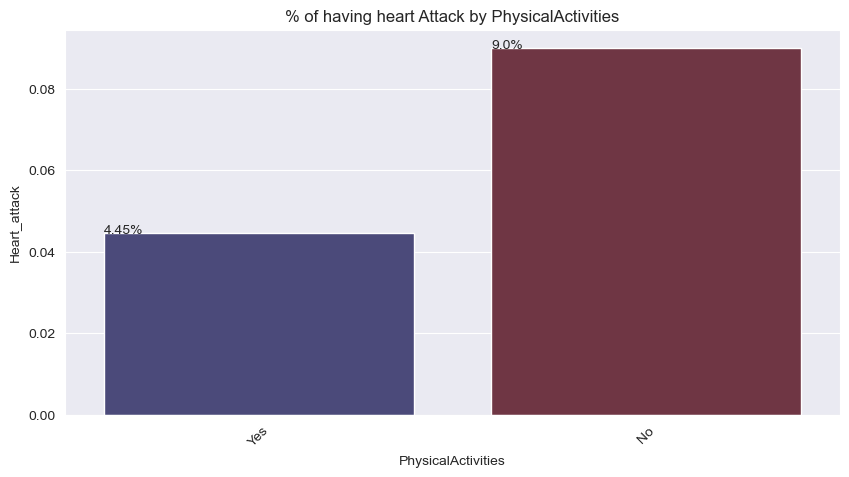

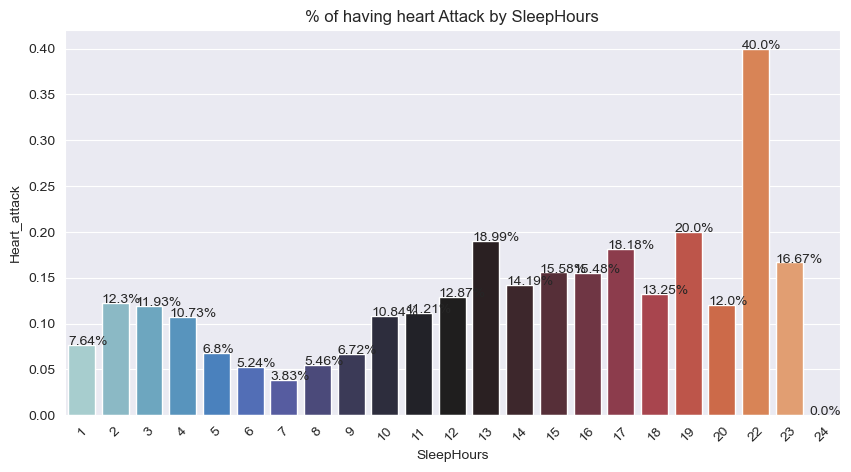

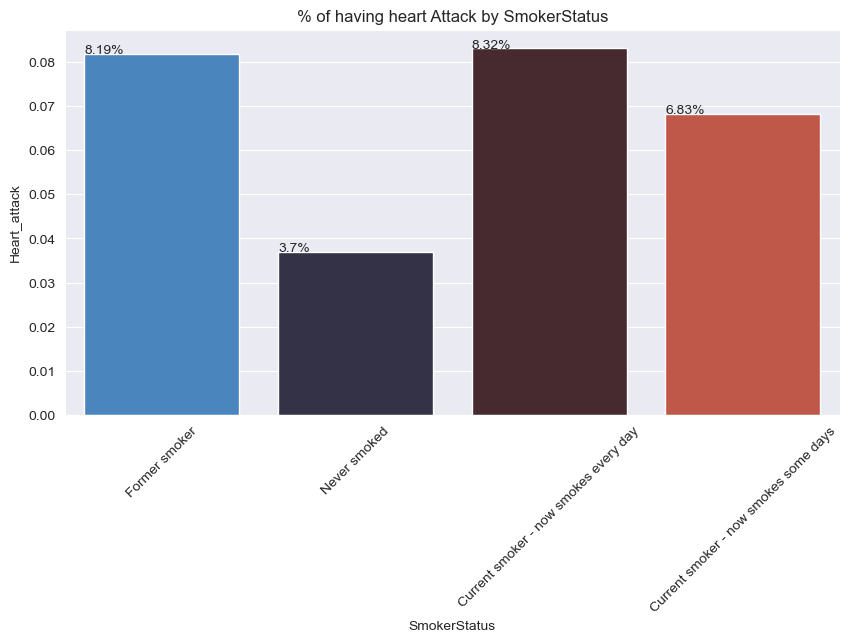

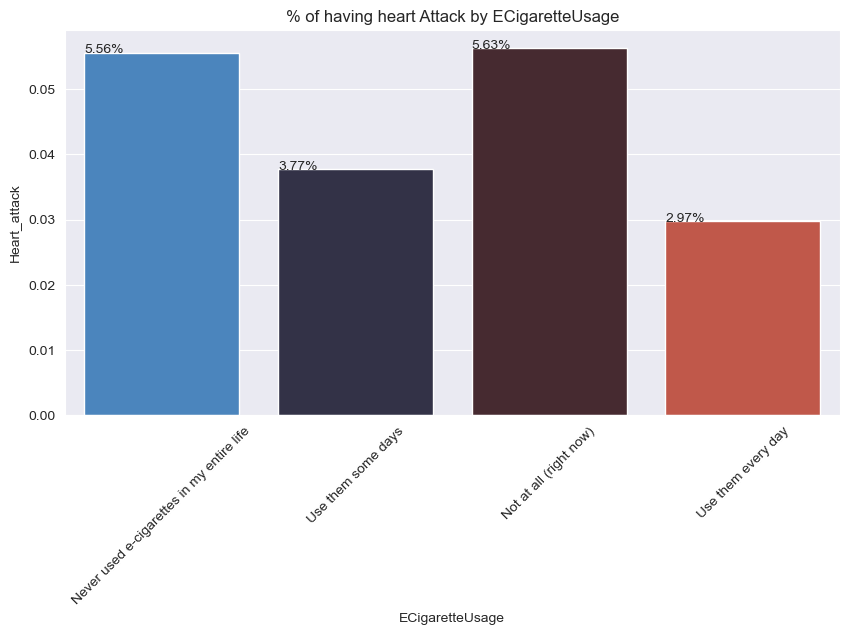

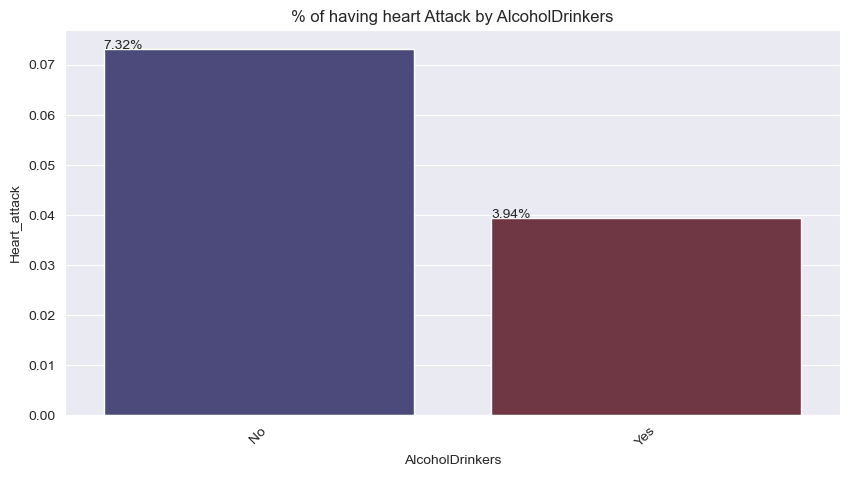

In [21]:

Lifestyle_health_behaviors = ['PhysicalActivities','SleepHours', 'SmokerStatus','ECigaretteUsage', 'AlcoholDrinkers']


def myplot1(item):
    fig,ax=plt.subplots(figsize=(10,5))
    g = sns.barplot(x=item, y="Heart_attack", data=heart_2022, palette='icefire', ax=ax, errorbar=None)
    
    
    for p in ax.patches:
        txt = str((p.get_height()*100).round(2)) + '%'
        txt_x = p.get_x() 
        txt_x1 = g.get_xticks()
        xtick_labels = g.get_xticklabels()
        txt_y = p.get_height()
        ax.text(txt_x,txt_y,txt)
        ax.set_title("% of having heart Attack by " + item )
        ax.set_xticks(ticks=txt_x1, rotation = 45, labels = xtick_labels)
    plt.show()
    
for item in Lifestyle_health_behaviors:
    myplot1(item)

            - preventive measures

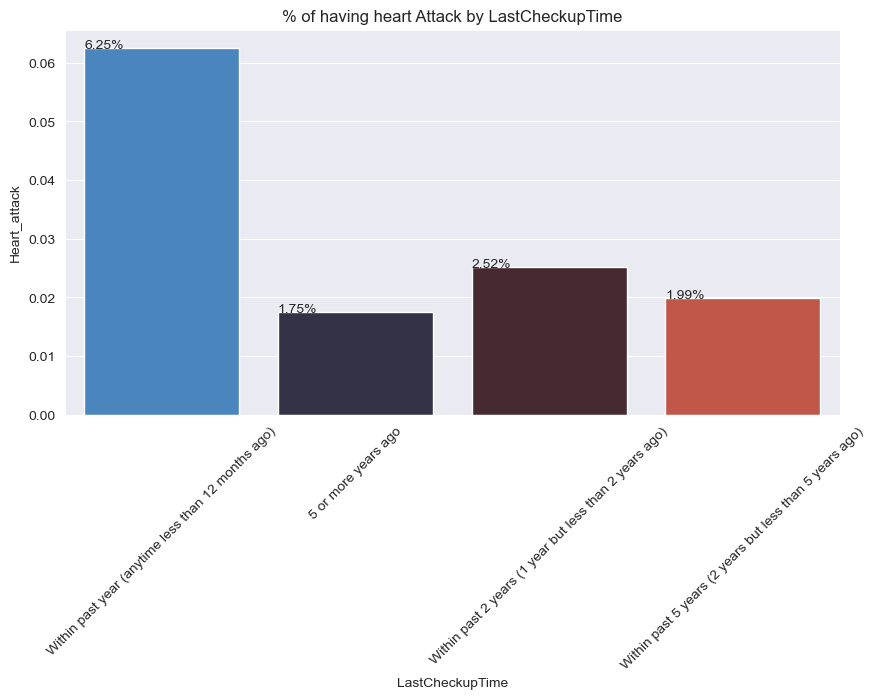

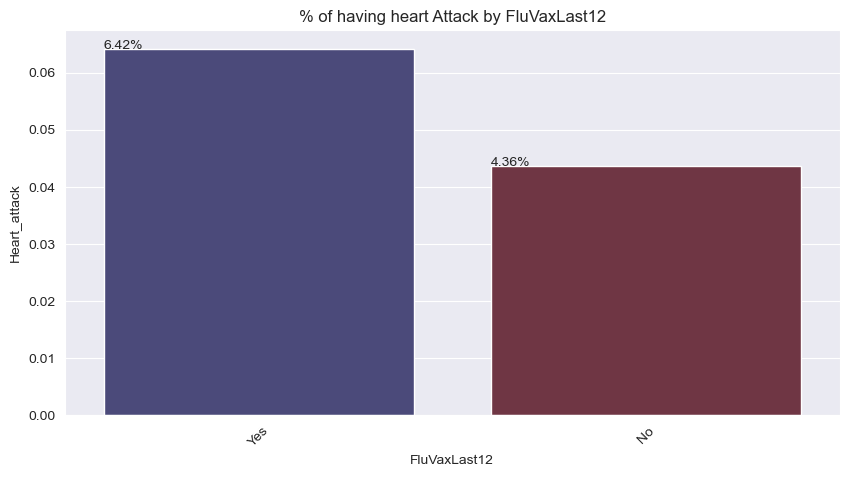

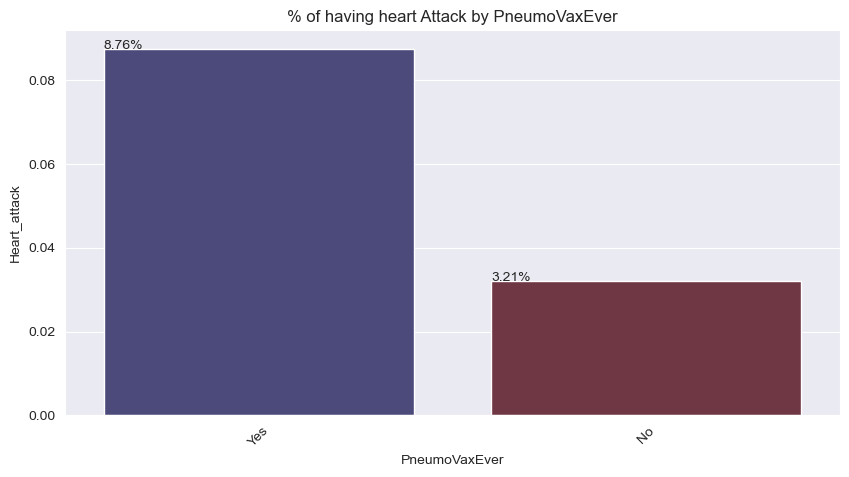

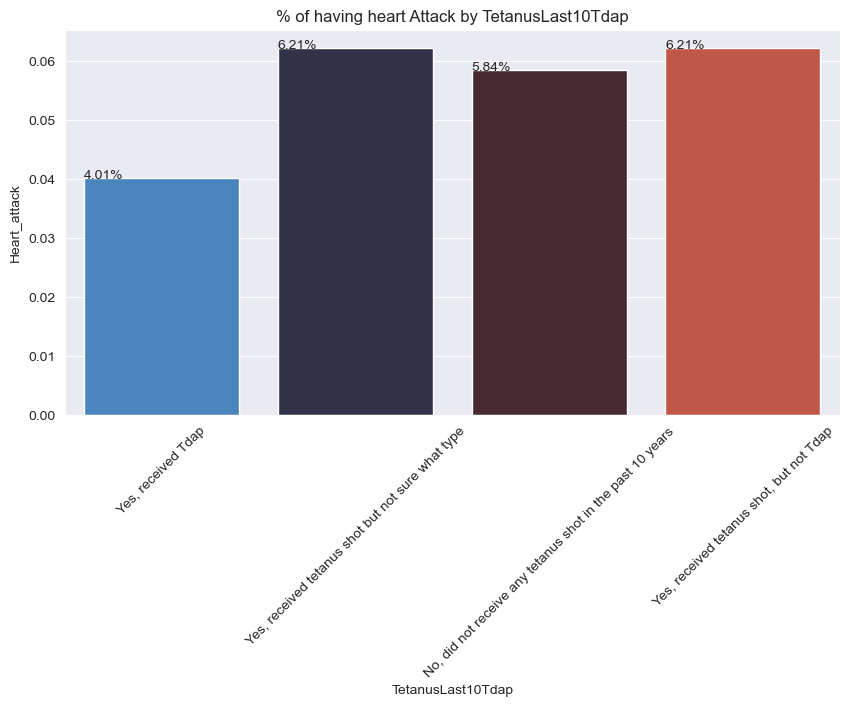

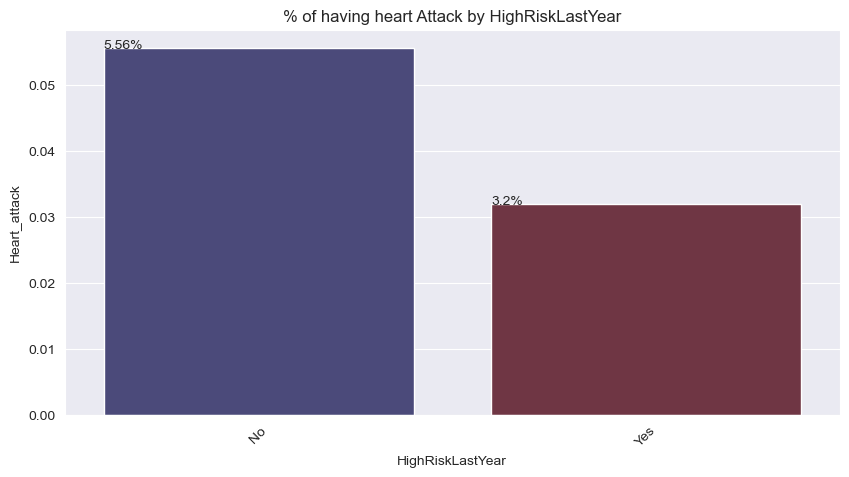

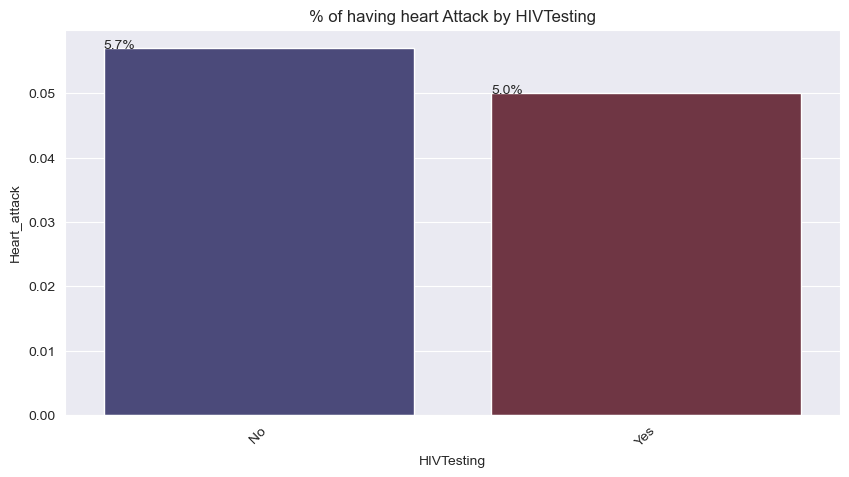

In [22]:
preventive_measures = ['LastCheckupTime','FluVaxLast12', 'PneumoVaxEver','TetanusLast10Tdap', 'HighRiskLastYear', 'HIVTesting']


def myplot2(item):
    fig,ax=plt.subplots(figsize=(10,5))
    g = sns.barplot(x=item, y="Heart_attack", data=heart_2022, palette='icefire', ax=ax, errorbar=None)
    
    for p in ax.patches:
        txt = str((p.get_height()*100).round(2)) + '%'
        txt_x = p.get_x() 
        txt_x1 = g.get_xticks()
        xtick_labels = g.get_xticklabels()
        txt_y = p.get_height()
        ax.text(txt_x,txt_y,txt)
        ax.set_title("% of having heart Attack by " + item )
        ax.set_xticks(ticks=txt_x1, rotation = 45, labels = xtick_labels)
    plt.show()
    
for item in preventive_measures:
    myplot2(item)

            - Weight management

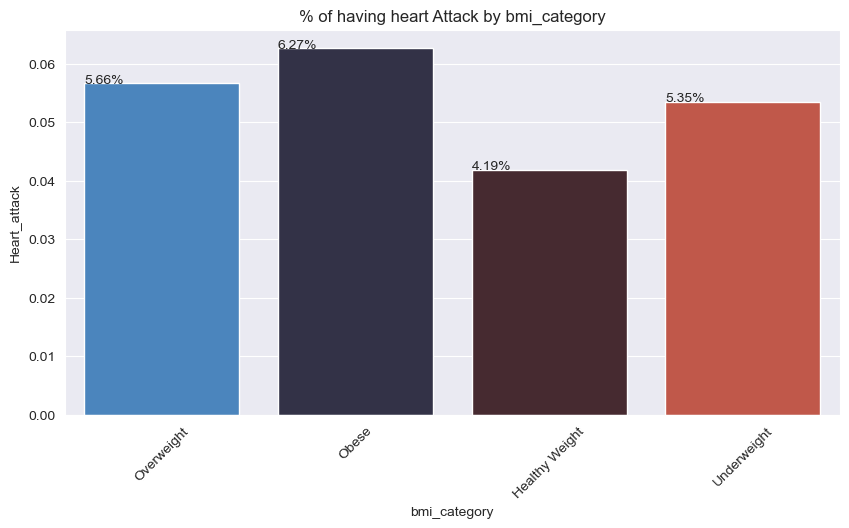

In [23]:
Weight_management = ['bmi_category']


def myplot3(item):
    fig,ax=plt.subplots(figsize=(10,5))
    g = sns.barplot(x=item, y="Heart_attack", data=heart_2022, ax=ax, palette='icefire', errorbar=None)
    
    for p in ax.patches:
        txt = str((p.get_height()*100).round(2)) + '%'
        txt_x = p.get_x() 
        txt_x1 = g.get_xticks()
        xtick_labels = g.get_xticklabels()
        txt_y = p.get_height()
        ax.text(txt_x,txt_y,txt)
        ax.set_title("% of having heart Attack by " + item )
        ax.set_xticks(ticks=txt_x1, rotation = 45, labels = xtick_labels)
    plt.show()
    
for item in Weight_management:
    myplot3(item)

    b. Non- Controllable factors

           - Demographic factors: 

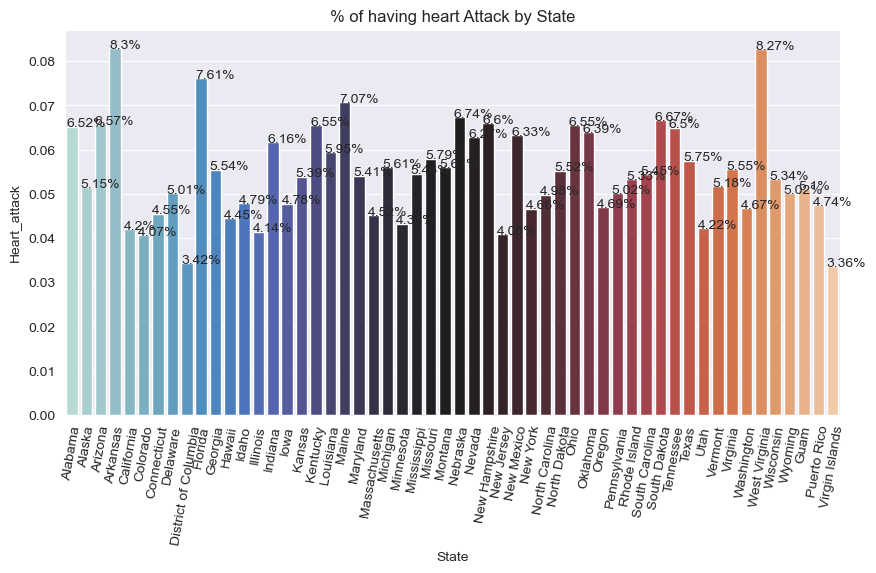

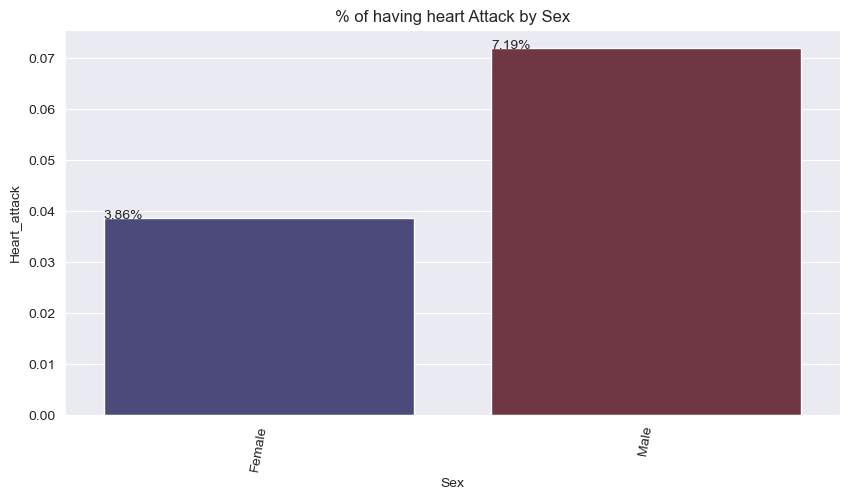

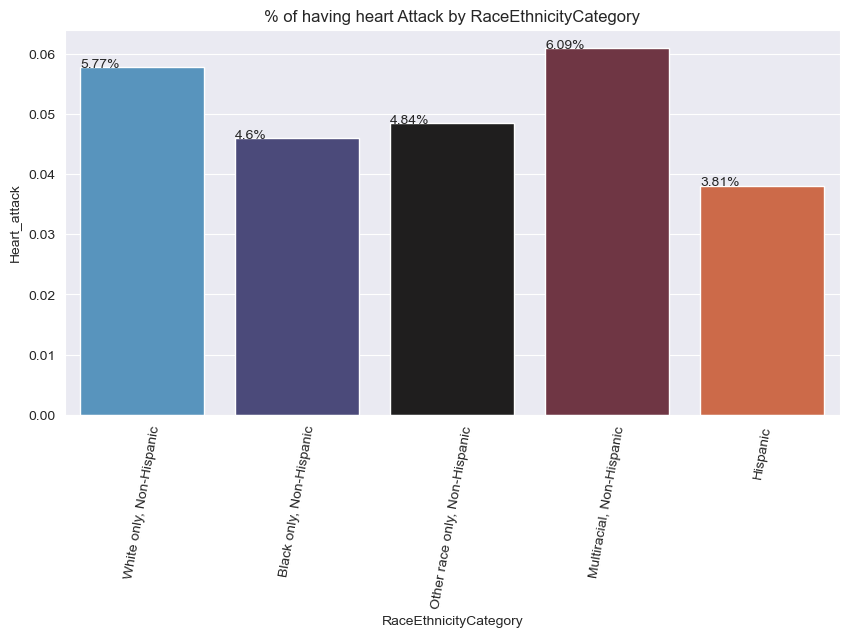

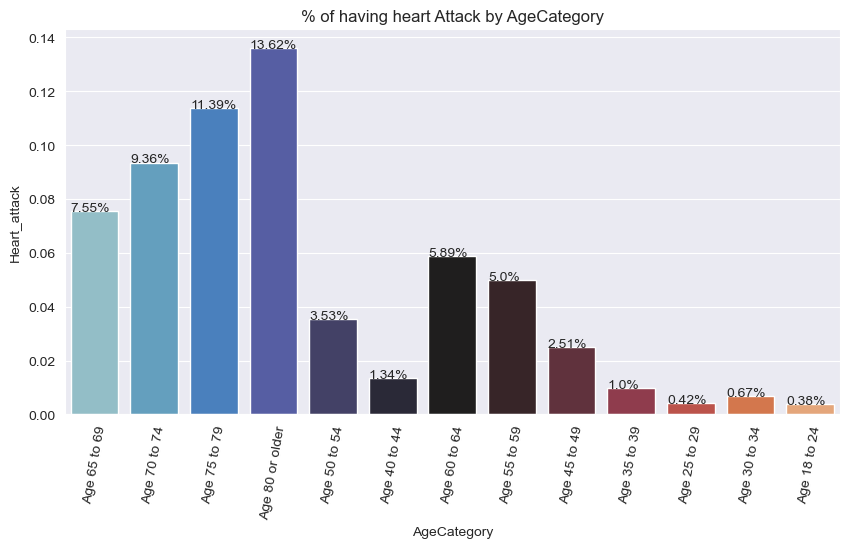

In [24]:
Demographic_factors = ['State','Sex', 'RaceEthnicityCategory','AgeCategory']


def myplot4(item):
    fig,ax=plt.subplots(figsize=(10,5))
    g = sns.barplot(x=item, y="Heart_attack", data=heart_2022, palette='icefire', ax=ax, errorbar=None)
    
    for p in ax.patches:
        txt = str((p.get_height()*100).round(2)) + '%'
        txt_x = p.get_x() 
        txt_x1 = g.get_xticks()
        xtick_labels = g.get_xticklabels()
        txt_y = p.get_height()
        ax.text(txt_x,txt_y,txt)
        ax.set_title("% of having heart Attack by " + item )
        ax.set_xticks(ticks=txt_x1, rotation = 80, labels = xtick_labels)
    
for item in Demographic_factors:
    myplot4(item)

            - Health Status 

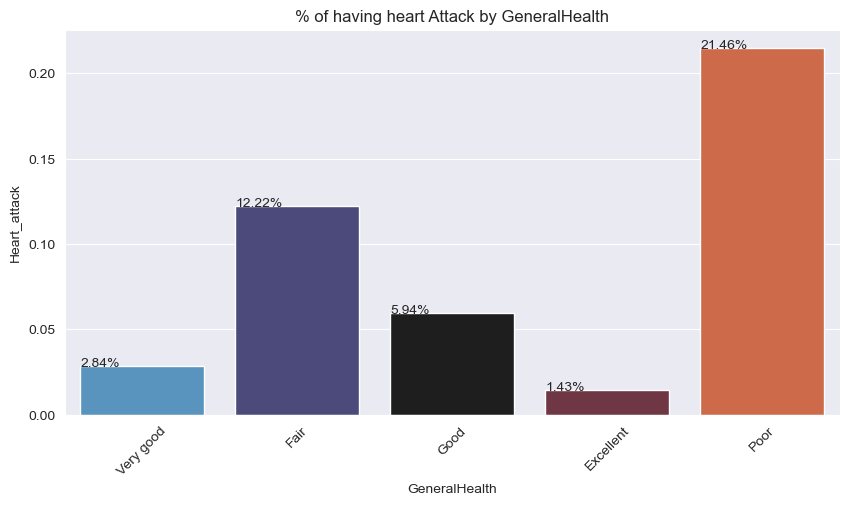

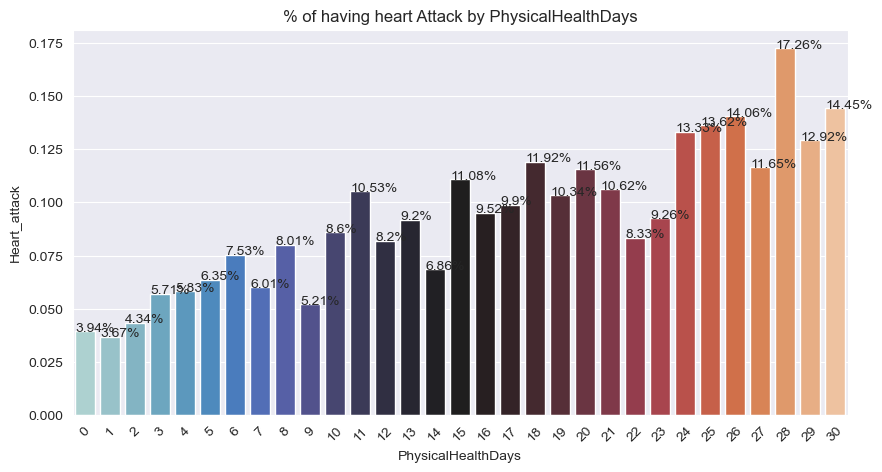

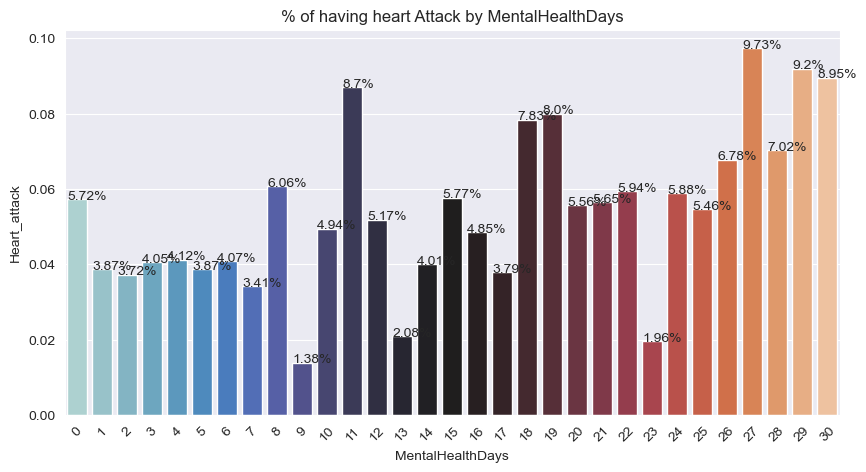

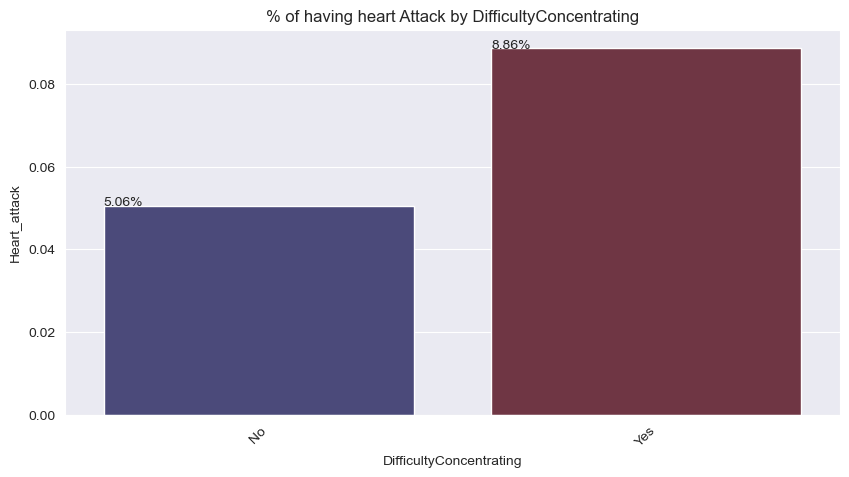

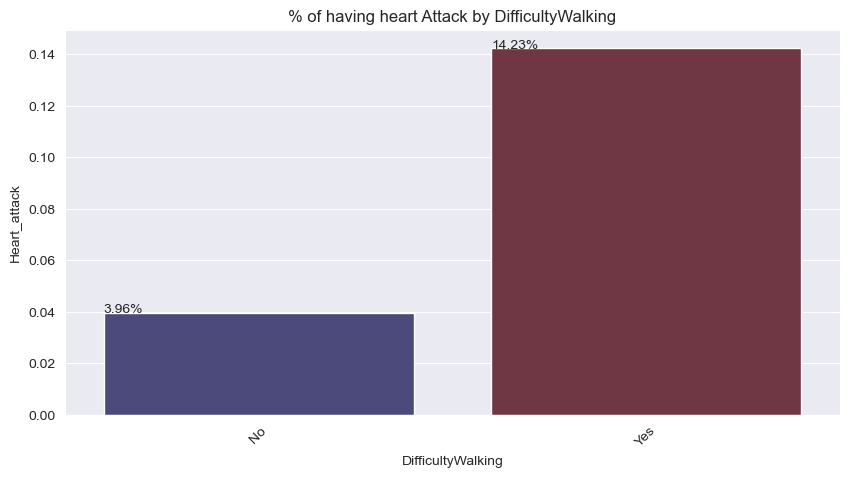

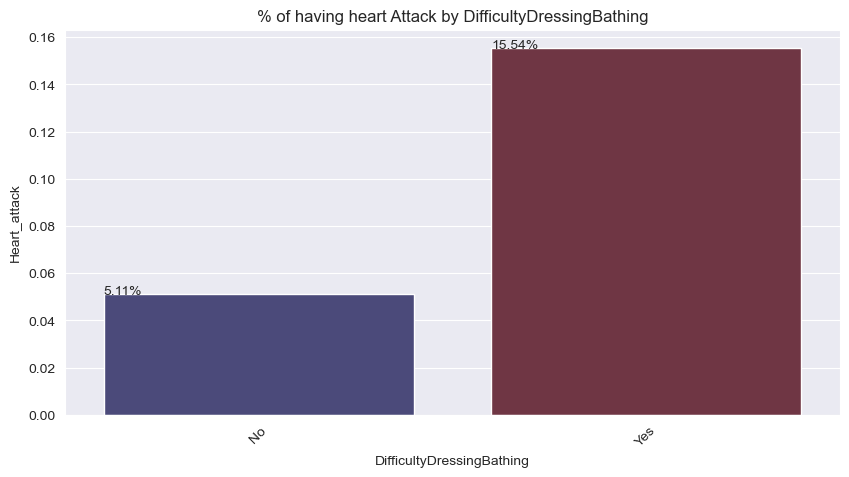

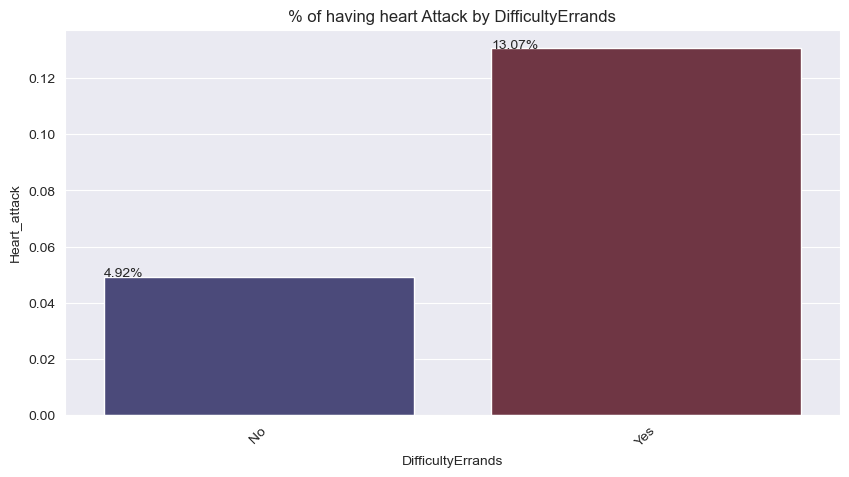

In [25]:
Health_Status = ['GeneralHealth', 'PhysicalHealthDays',   'MentalHealthDays',
       'DifficultyConcentrating', 'DifficultyWalking',  'DifficultyDressingBathing', 'DifficultyErrands']


def myplot5(item):
    fig,ax=plt.subplots(figsize=(10,5))
    g = sns.barplot(x=item, y="Heart_attack", data=heart_2022, palette='icefire', ax=ax, errorbar=None)
    
    for p in ax.patches:
        txt = str((p.get_height()*100).round(2)) + '%'
        txt_x = p.get_x() 
        txt_x1 = g.get_xticks()
        xtick_labels = g.get_xticklabels()
        txt_y = p.get_height()
        ax.text(txt_x,txt_y,txt)
        ax.set_title("% of having heart Attack by " + item )
        ax.set_xticks(ticks=txt_x1, rotation = 45, labels = xtick_labels)
    plt.show()
    
for item in Health_Status:
    myplot5(item)

            -   Medical History

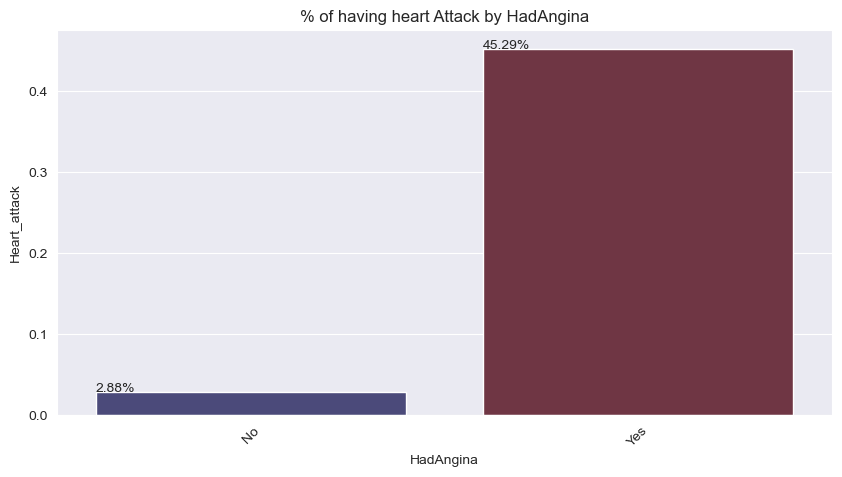

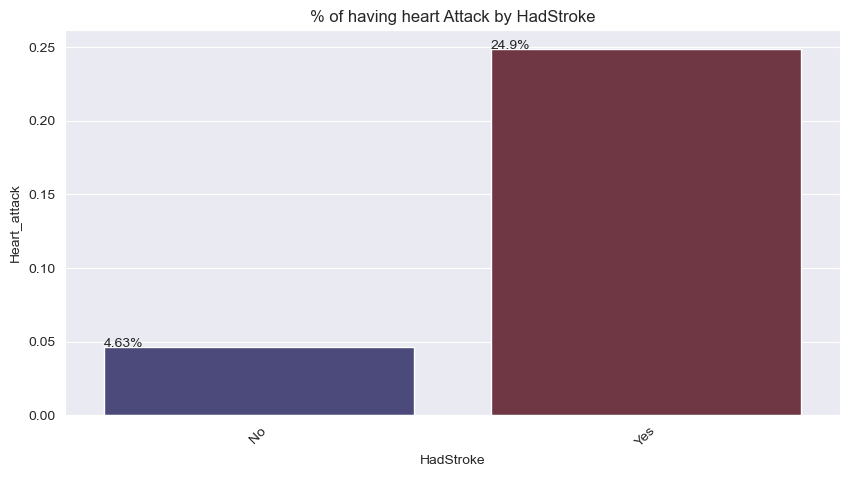

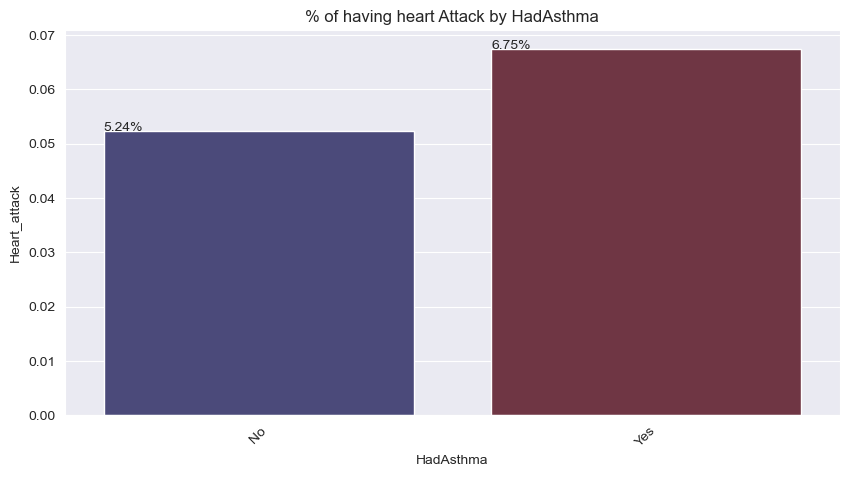

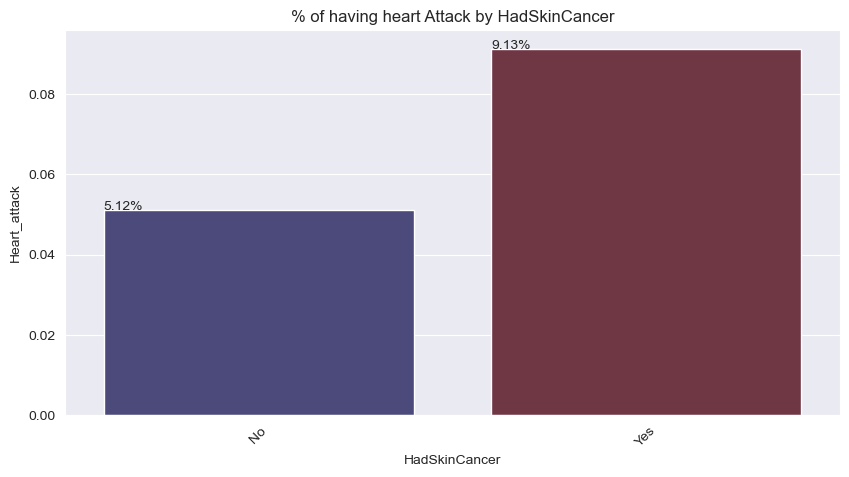

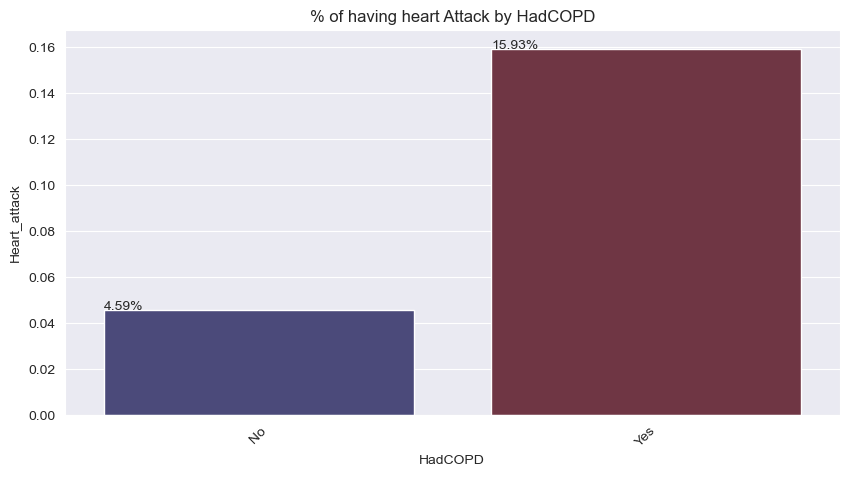

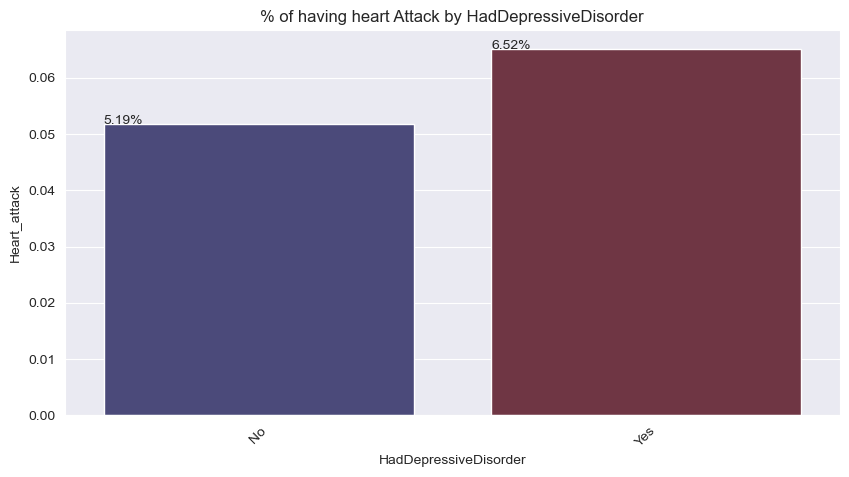

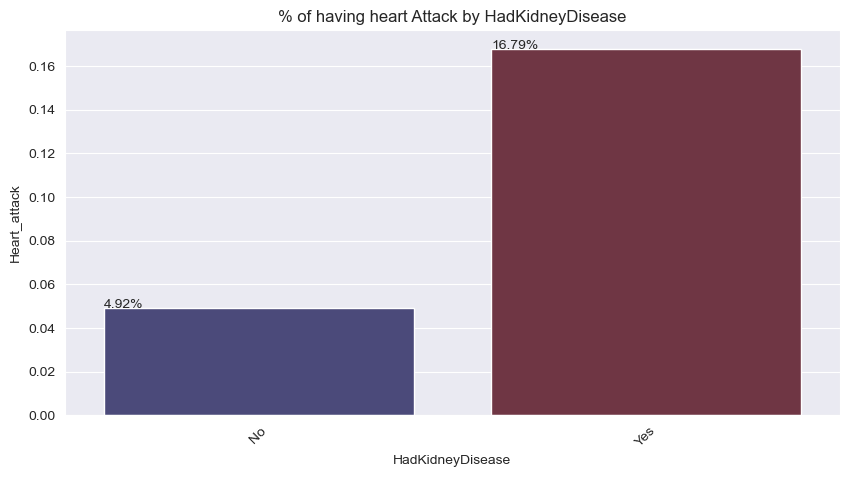

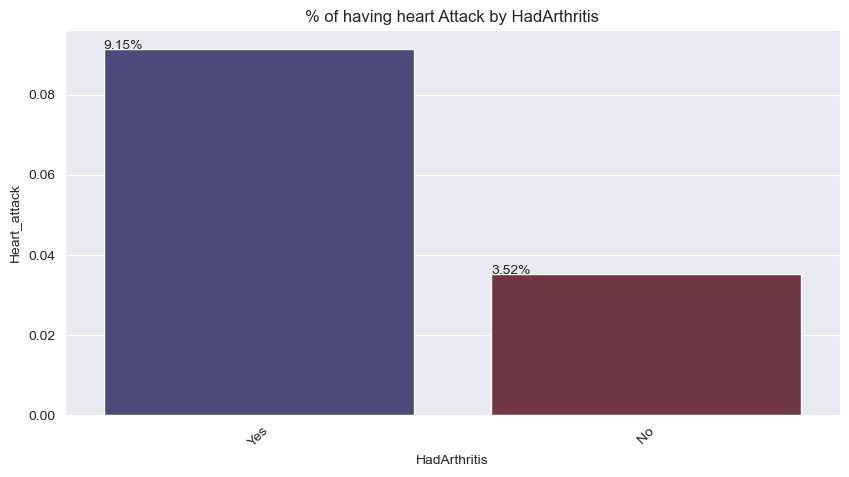

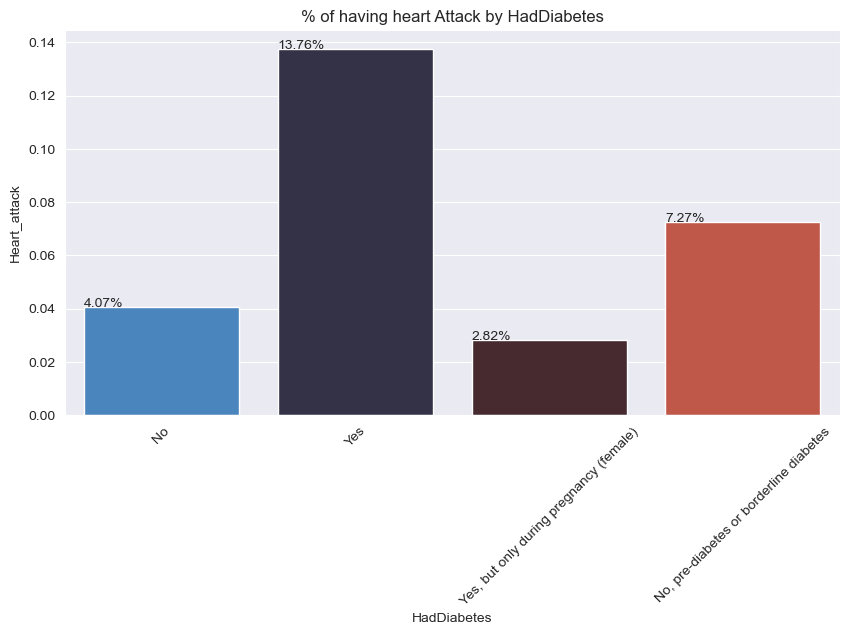

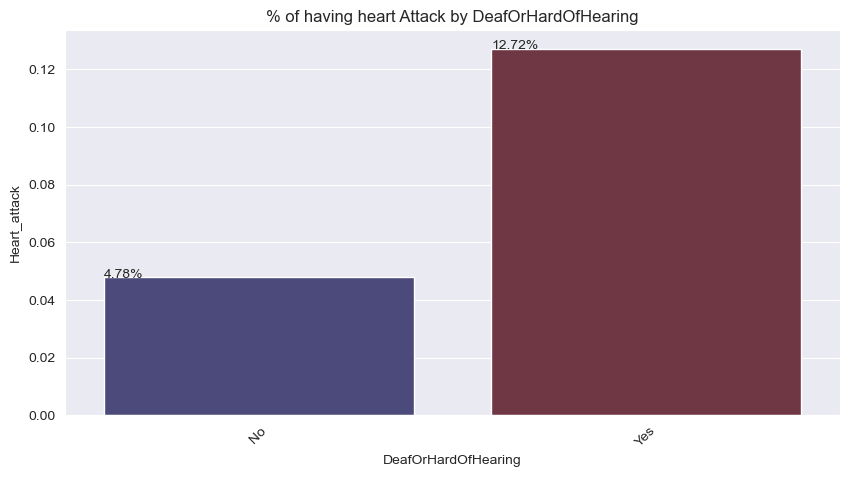

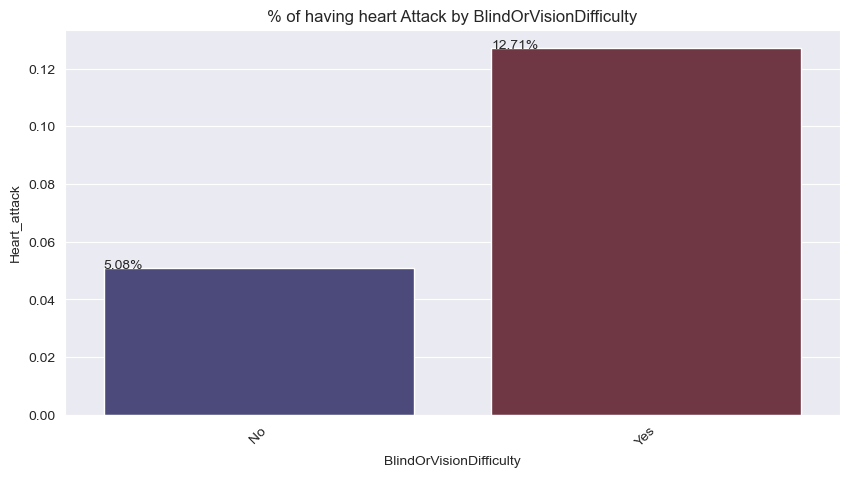

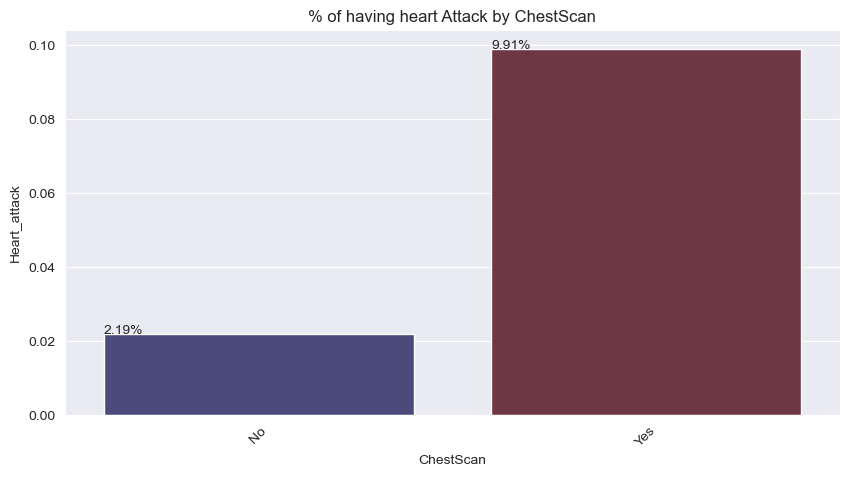

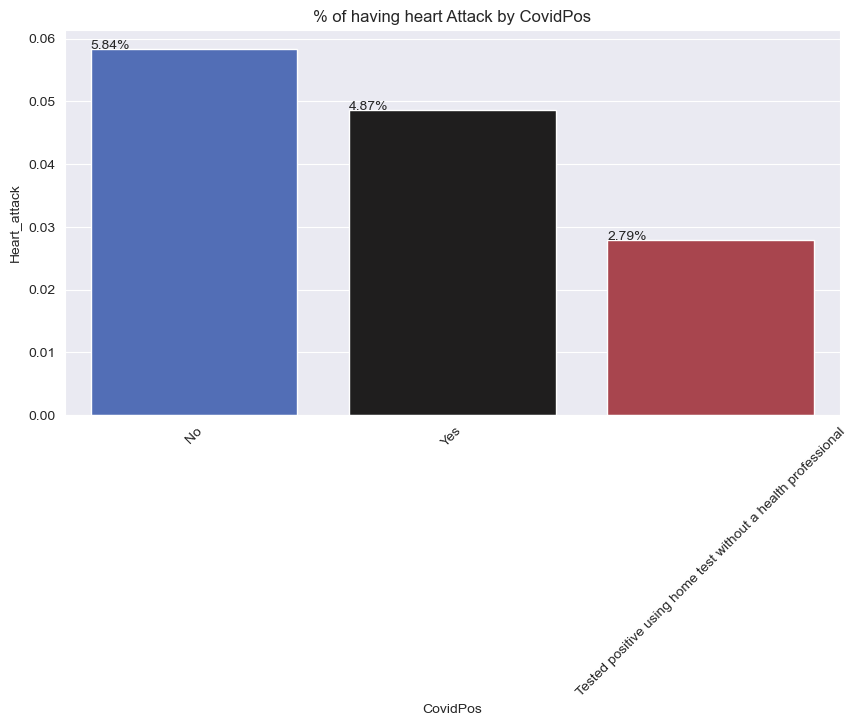

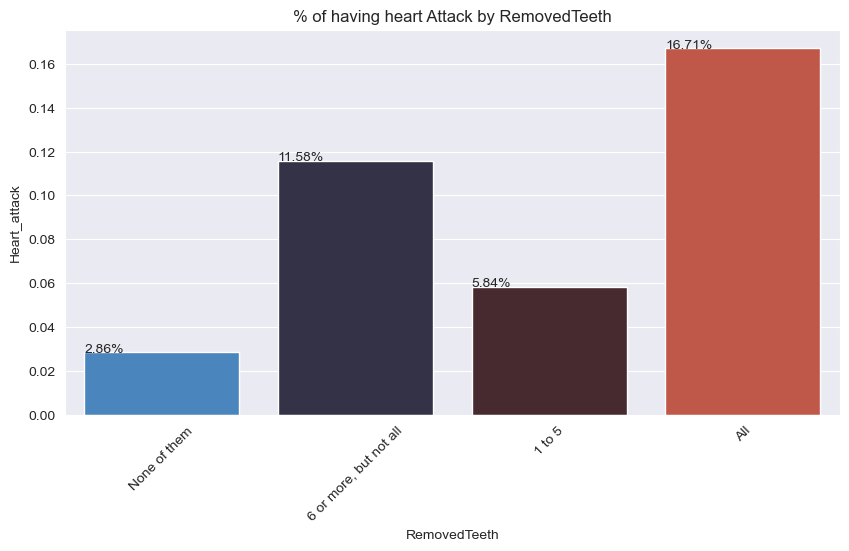

In [26]:
Medical_History = ['HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',  'HadDepressiveDisorder', 'HadKidneyDisease', 
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'ChestScan', 'CovidPos', 'RemovedTeeth']


def myplot6(item):
    fig,ax=plt.subplots(figsize=(10,5))
    g = sns.barplot(x=item, y="Heart_attack", data=heart_2022, palette='icefire', ax=ax, errorbar=None)
    
    for p in ax.patches:
        txt = str((p.get_height()*100).round(2)) + '%'
        txt_x = p.get_x() 
        txt_x1 = g.get_xticks()
        xtick_labels = g.get_xticklabels()
        txt_y = p.get_height()
        ax.text(txt_x,txt_y,txt)
        ax.set_title("% of having heart Attack by " + item )
        ax.set_xticks(ticks=txt_x1, rotation = 45, labels = xtick_labels)
    plt.show()
    
for item in Medical_History:
    myplot6(item)

Correlation between numerical variables and heart attack

<Axes: >

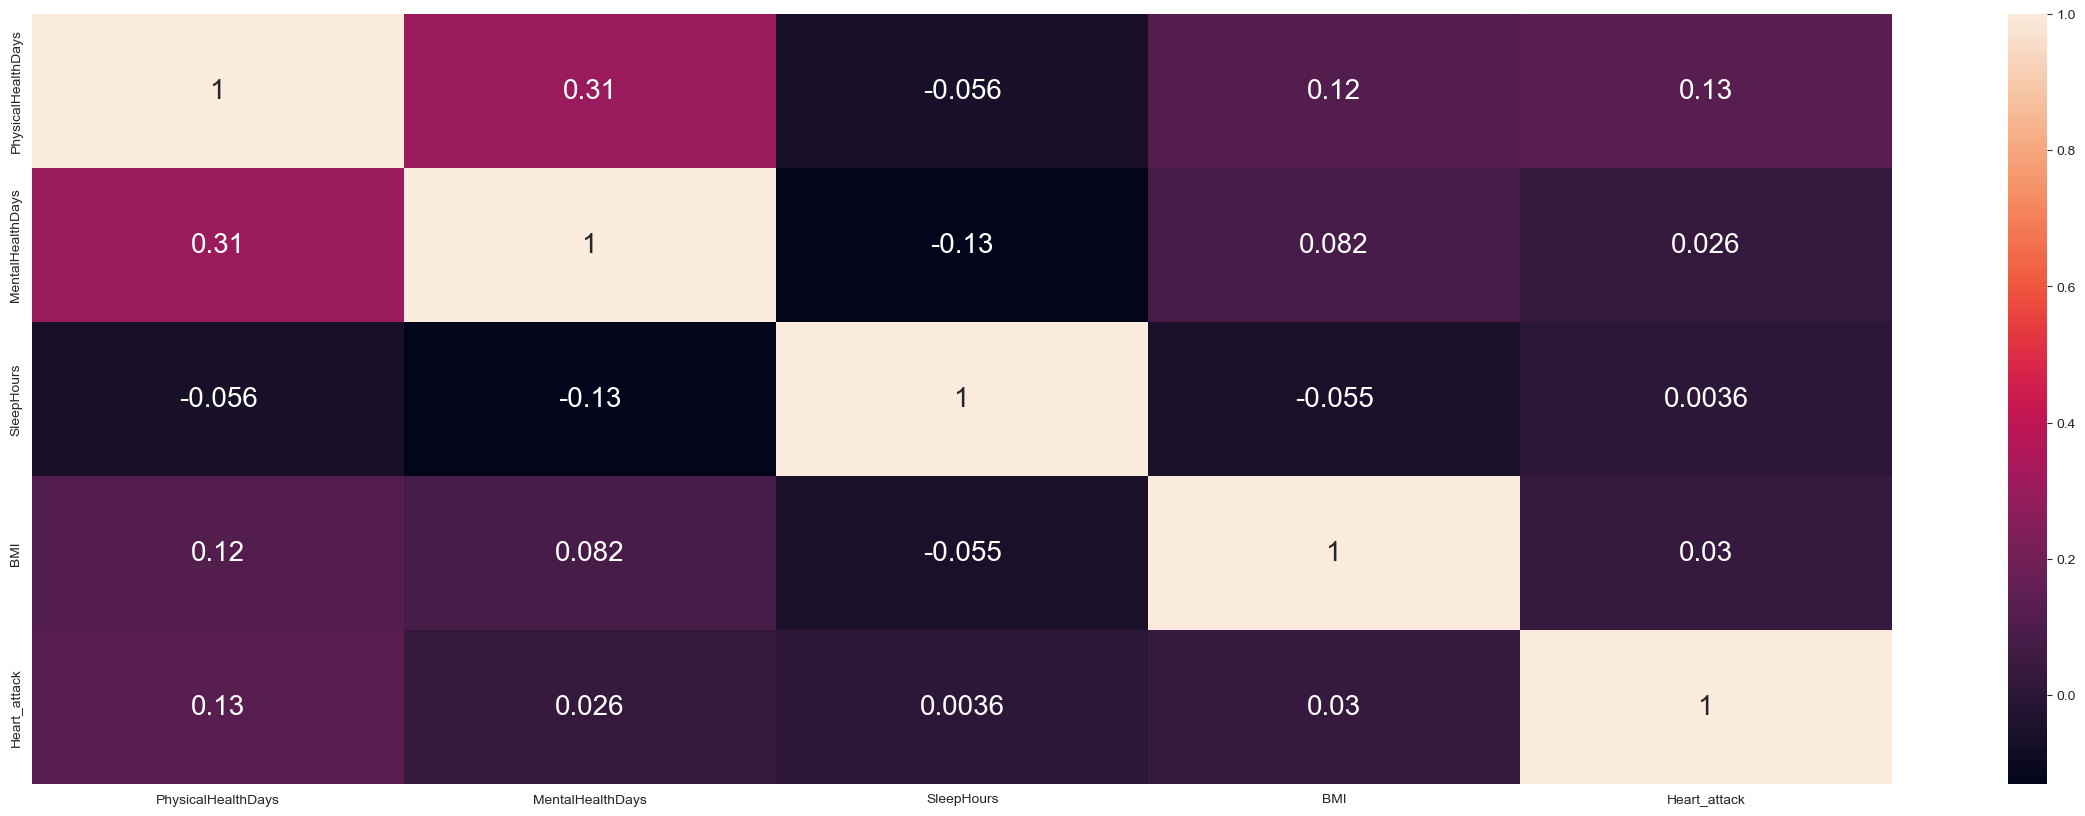

In [27]:
corr_heart_2022 = heart_2022[["PhysicalHealthDays","MentalHealthDays", "SleepHours", "BMI", "Heart_attack"]].corr()
sns.heatmap(corr_heart_2022, annot=True, annot_kws={'size': 20})

In [28]:
heart_2022.to_csv('heart_2022.csv')

From the above heatmap, it turns out physicalhealthdays, BMI and mentalHealthdays are the variables that are more correlated to had heart attack.

5) INSIGHTS


From the visualizations above, we can provide a list of top  10 variables that might have the highest correlation to heart attack based on the percentage value of each and every one.


 
Angina      ---> 42.29%

Stroke      ---> 24.9%

poor health ---> 21.46%

kidney disease ---> 16.79

Removed teeth ---> 16.71%

COPD (Chronic Obstructive Pulmonary Disease) ---> 15.93%

Diabetes      ---> 13.76%

Arthritis     ---> 9.15 %

Skin cancer   ---> 9.13%   

Not active    ---> 9%


Eventhough the variables above have highest percentage value in heart attack match,  there are others output or considerations that can not be neglicted:

1- The data shows that heart attack is more common in men than in women.

2- Tobacco (smoking) use increases the risk of developing heart attack.

3- Alcohol consumption slighty reduce the risk of having heart attack.

4- The likelihood of developing heart attack rises as one gets older.

5- Under sleeping and over sleeping increase the risk of heart attack.

6- Obese people have a high risk of heart attack




  RECOMMENDATIONS
  

1) Both men and women should focus on maintaining a heart-healthy lifestyle, including regular exercise, a balanced diet, and routine check-ups with healthcare providers to manage and control any cardiovascular risk factors.


2) Quitting smoking is one of the most effective ways to reduce the risk of heart attack. Seek support from healthcare professionals, use smoking cessation programs, and consider nicotine replacement therapies to help quit smoking.


3) If you choose to drink alcohol, do so in moderation. For men, moderate drinking is generally defined as up to two drinks per day, and for women, up to one drink per day. However, it's essential to consult with healthcare professionals to determine what level of alcohol consumption is appropriate for individual health.


3) Regardless of age, maintaining a healthy lifestyle is crucial. This includes regular physical activity, a balanced diet rich in fruits and vegetables, maintaining a healthy weight, and managing other risk factors such as blood pressure, cholesterol, and diabetes through regular check-ups.


4) Aim for 7-9 hours of quality sleep per night. Establish a consistent sleep schedule, create a comfortable sleep environment, and practice good sleep hygiene. If sleep disturbances persist, seek advice from a healthcare professional.


5) Adopt a healthy and balanced diet, engage in regular physical activity, and work with healthcare professionals or registered dietitians to develop a personalized weight management plan.